# **Project 3:  Early Prediction of Diabetes Risk using Machine Learning**

To build a machine learning model (K-Nearest Neighbors) that predicts whether a person has diabetes, using real-world health data.

The project includes:
- Data exploration & cleaning
- Visualization (histograms, scatter matrix, pairplot, heatmap)
- Handling imbalance with SMOTE
- Finding best K for KNN
- Evaluating model accuracy, precision, recall & F1 score

### Cell 1: Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

### Cell 2: Import Dataset and Frist Five rows of datadet

In [ ]:
df = pd.read_csv('diabetes-data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Cell 3: Shape of the dataset
Rows: 768

columns: 9

In [ ]:
df.shape

(768, 9)

### Cell 4: It provides a brief summary of the dataset, showing the number of rows, columns, data types, and missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###  Cell 5: Summary Statistics & Initial Insights

We display the summary statistics of all numeric columns to understand data distribution, average values, and detect possible issues:
- Some columns like **Glucose, BloodPressure, SkinThickness, Insulin, BMI** have a minimum value of **0**, which is medically unrealistic — these likely represent missing data and should be cleaned.
- The average age of patients is about **33 years**, suggesting the dataset includes relatively young adults.
- The maximum insulin value (**846**) seems quite high and might be an outlier.
- The Outcome column mean (**~0.34**) shows that roughly **34%** of patients have diabetes, confirming the dataset is imbalanced.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Cell 6: Make a Deep Copy of the Dataset

We create a deep copy of the original DataFrame to safely perform cleaning and transformations.
This way, the original dataset remains unchanged, and all data cleaning steps are done on df_copy.


In [ ]:
df_copy = df.copy(deep=True)
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Cell 7: Visualizing Data Distribution with Histograms

We plot histograms of all numerical columns to explore the distribution of values and spot potential issues:
- Look for unrealistic values like **0** in health metrics (e.g., Glucose, BMI, BloodPressure).
- Check for skewed distributions, outliers, or data imbalance.


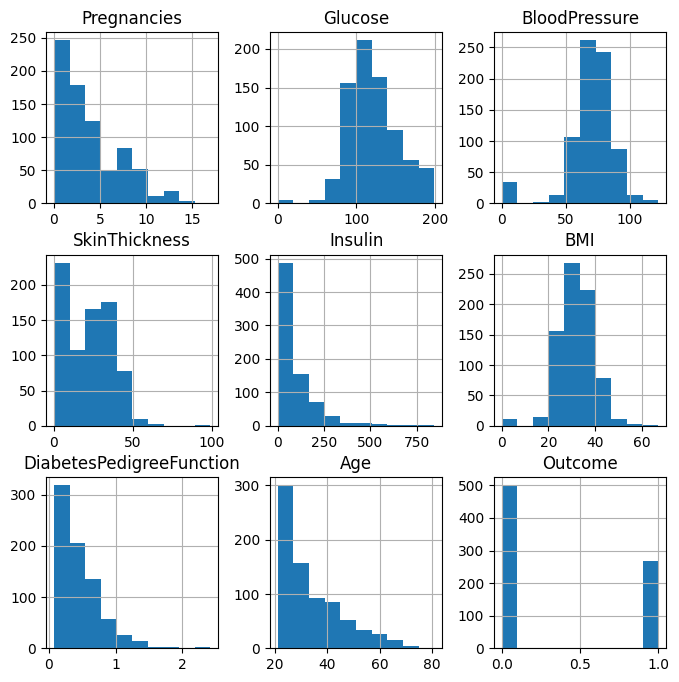

In [ ]:
hist_plot = df_copy.hist(figsize=(8,8))
plt.show()

### Cell 8: Countplot: Number of diabetic and non-diabetic patients across age groups

- This plot shows how diabetes cases are distributed across different age ranges.  
- By grouping patients into age bands, we can see if diabetes is more common in certain age groups.  
- It helps identify trends, like whether older patients have a higher chance of being diabetic.


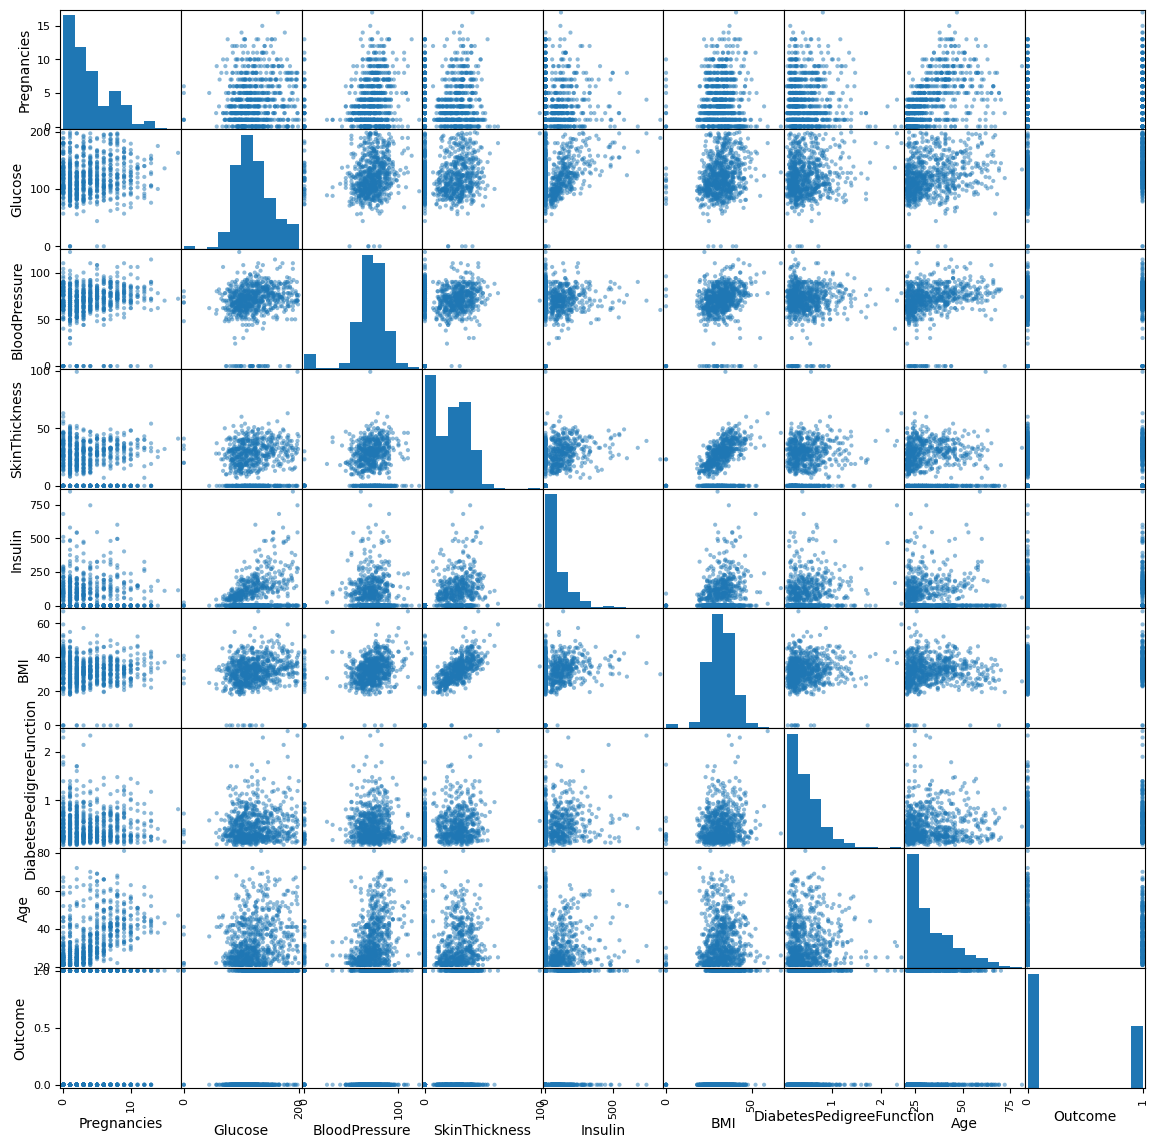

In [ ]:
age_group = pd.cut(df_copy['Age'], bins=[20,30,40,50,60,70,80], labels=['20-30','30-40','40-50','50-60','60-70','70-80'])

plt.figure(figsize=(8,6))
sns.countplot(x=age_group, hue='Outcome', data=df_copy)
plt.title('Diabetes Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Cell 9: Pairplot with Hue='Outcome' to Visualize Class Separation

We use a Seaborn pairplot to explore how different features relate to each other, coloring points by diabetes status (Outcome):
- Points with different colors help us see which features separate diabetic and non-diabetic patients.
- Useful for spotting trends, clusters, or overlap between classes.

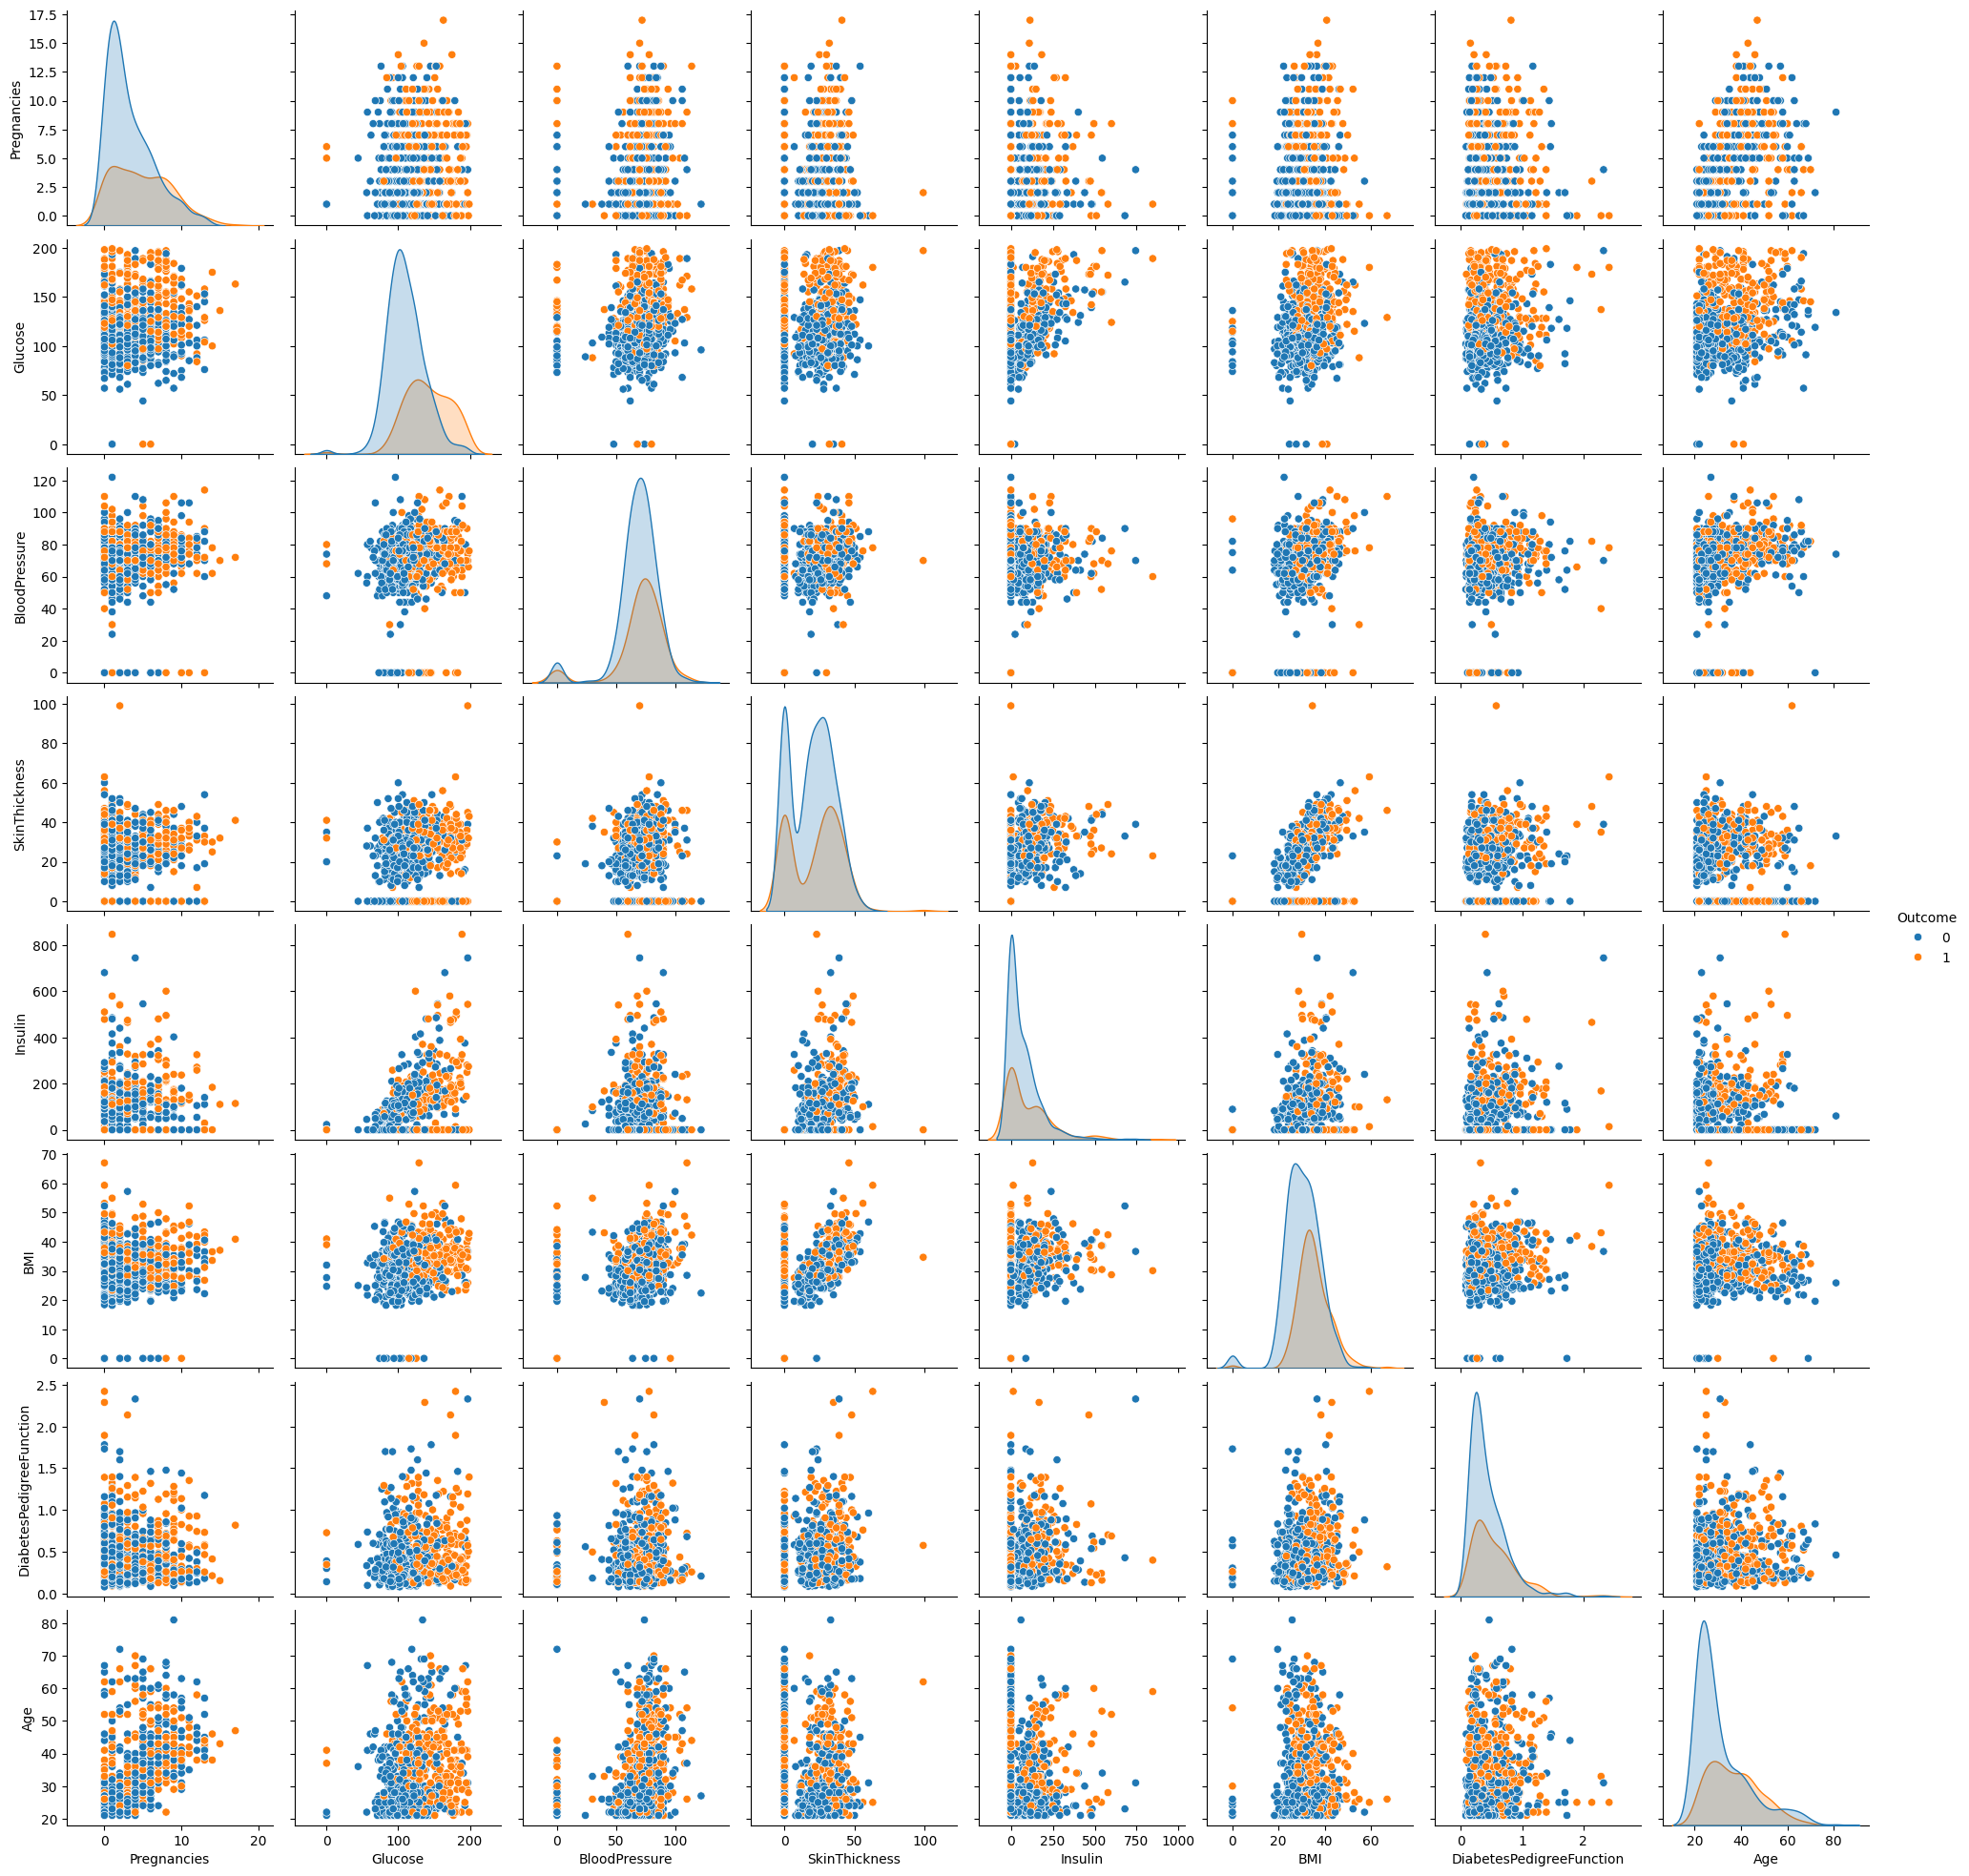

In [ ]:
Sccater_plot = sns.pairplot(df_copy, hue='Outcome', kind="scatter")
plt.show()

### Cell 10: Scatter Matrix to Visualize Pairwise Relationships

We plot a scatter matrix of all numerical features to:
- Explore how each pair of variables is related.
- Identify potential correlations, patterns, or outliers that might affect model training.


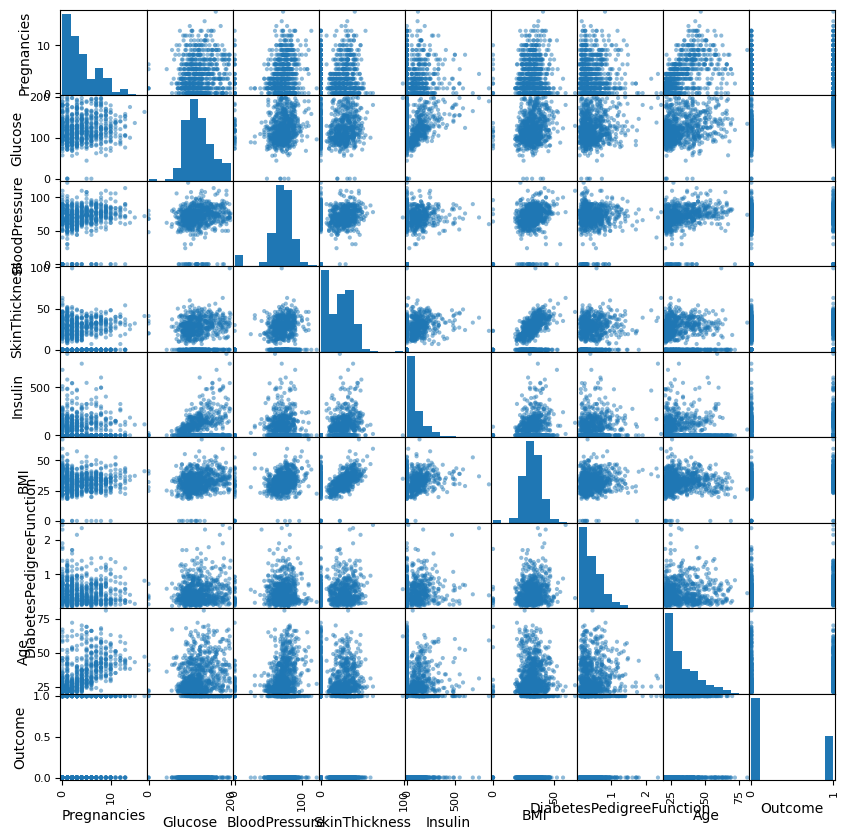

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(df_copy, figsize=(10,10))
plt.show()

### Cell 11: Replace Unrealistic Zero Values with Median

Some health-related columns contain zeros, which are medically unrealistic and likely indicate missing data.

We replace these zeros with the **median** value of each column to keep the distribution realistic and reduce the effect of outliers.


In [46]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    median = df_copy[col].median()
    df_copy[col] = df_copy[col].replace(0, median)


### Cell 12: Visual Comparison: Histograms Before and After Data Cleaning

We compare histograms of key health-related columns before and after replacing zeros with median:
- **Top row**: Original data — may show unrealistic spikes at zero.
- **Bottom row**: Cleaned data — distributions look more realistic.
This helps visually confirm that data cleaning was successful and the dataset is now ready for modeling.


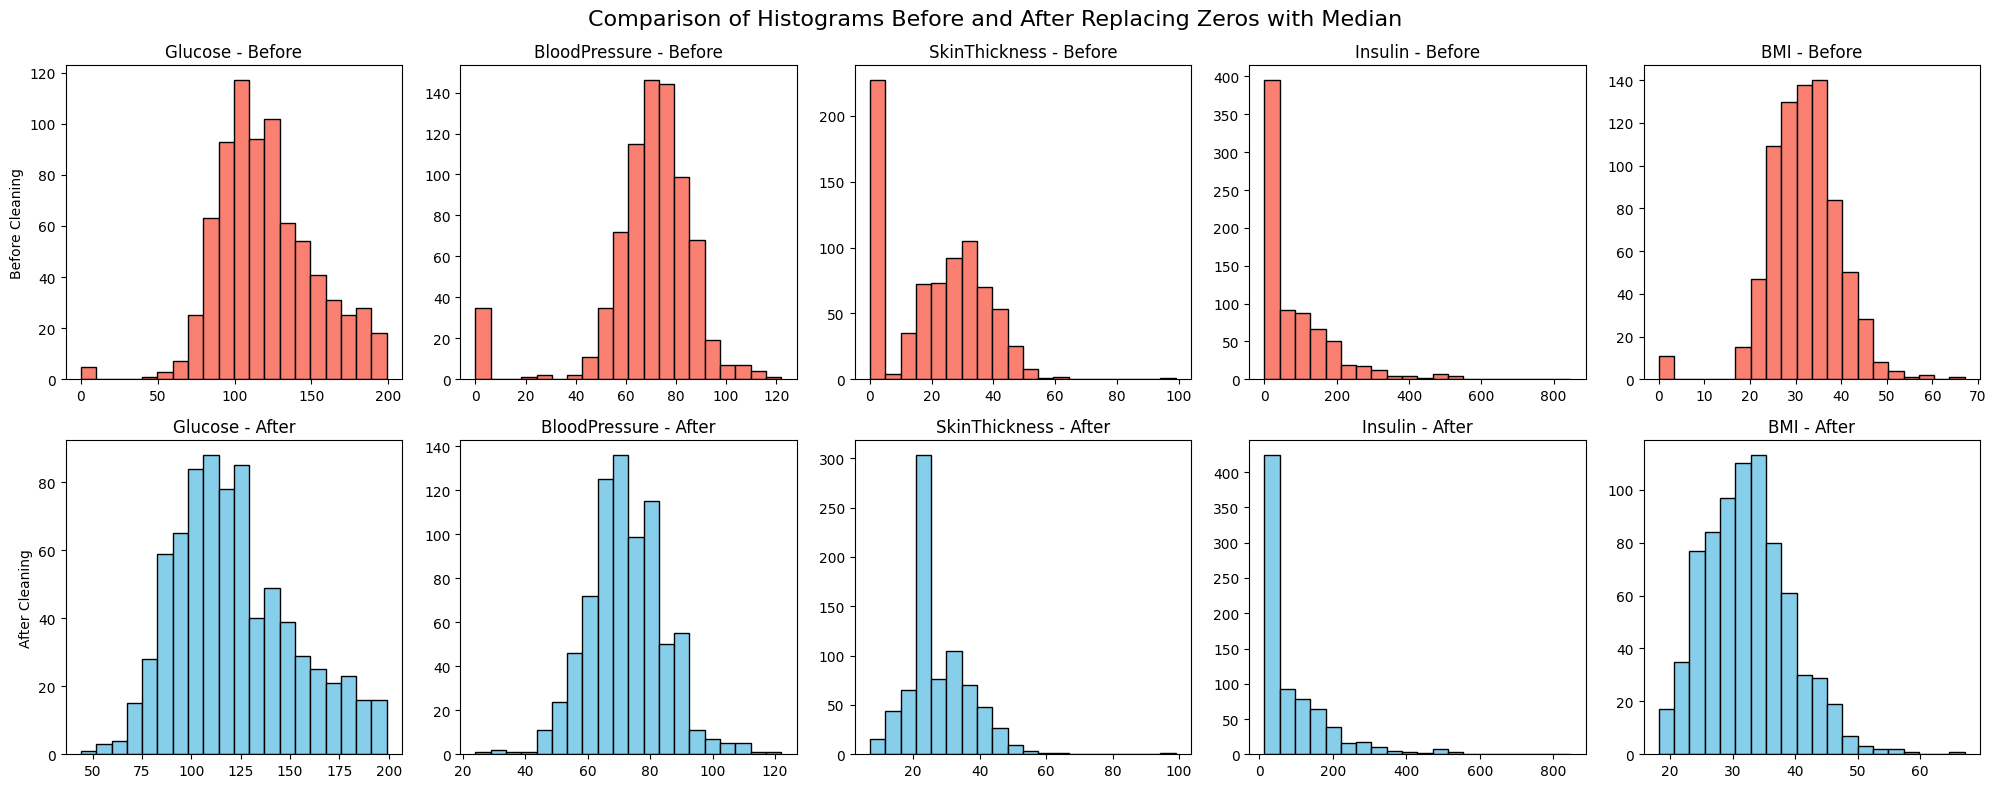

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=len(zero_cols), figsize=(4*len(zero_cols), 8))

for i, col in enumerate(zero_cols):
    # Before cleaning
    axes[0, i].hist(df[col], bins=20, color='salmon', edgecolor='black')
    axes[0, i].set_title(f'{col} - Before')

    # After cleaning
    axes[1, i].hist(df_copy[col], bins=20, color='skyblue', edgecolor='black')
    axes[1, i].set_title(f'{col} - After')

axes[0, 0].set_ylabel('Before Cleaning')
axes[1, 0].set_ylabel('After Cleaning')

plt.suptitle('Comparison of Histograms Before and After Replacing Zeros with Median', fontsize=16)
plt.tight_layout()
plt.show()

### Cell 13: Correlation Heatmap of Features

We visualize the correlation matrix to see how strongly features are related to each other and to the target variable (Outcome):
- Darker or higher positive values show strong positive relationships.
- Helps identify which features may be most useful for predicting diabetes.
- Also reveals features that might be redundant or not correlated.


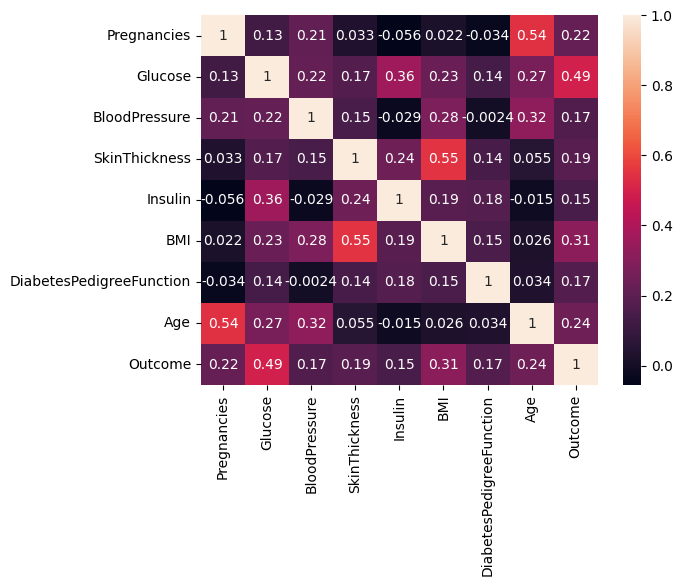

In [48]:
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

### Cell 14: Pie Chart of Diabetes Distribution

We visualize the proportion of patients with and without diabetes in the dataset:
- Helps check for **class imbalance**, which can affect model performance.
- Shows what percentage of the data belongs to each class.


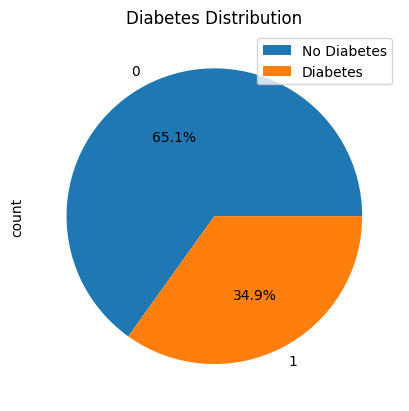

In [49]:
pie_chart = df_copy['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
labels = ['No Diabetes', 'Diabetes']
plt.legend(labels)
plt.title('Diabetes Distribution')
plt.show()

### Cell 15: Import Libraries for Preprocessing, Balancing & Evaluation

We import essential tools to prepare data and evaluate our model:
- train_test_split: Split data into training and testing sets.
- StandardScaler: Scale features to a similar range for better model performance.
- SMOTE: Handle class imbalance by oversampling the minority class.
- accuracy_score, classification_report, confusion_matrix: Evaluate the model’s predictions.


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

### Cell 16: Prepare Features and Target Variable

- Separate the dataset into:
  - X: Feature set (all columns except Outcome).
  - y: Target variable (Outcome), indicating diabetes status.
- Initialize StandardScaler to later scale the feature set for better model performance.


In [51]:
sc = StandardScaler()
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

### Cell 17: Feature Scaling & Checking Class Distribution

- We scale all feature columns using StandardScaler so that each has mean ≈ 0 and standard deviation ≈ 1.
- Convert the scaled data back to a DataFrame for easier analysis.
- Finally, check how many patients are diabetic vs non-diabetic (Outcome value counts) to understand class balance before modeling.


In [52]:
x_scaled = sc.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=df_copy.drop('Outcome', axis=1).columns)

### Cell 18: Split Data into Training and Testing Sets

Use stratify=y to keep the same proportion of diabetic and non-diabetic cases in both sets,  
and random_state=42 to ensure results are reproducible.


In [53]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Cell 19: Balancing the Training Data with SMOTE

Since the dataset has more non-diabetic than diabetic cases, we apply **SMOTE (Synthetic Minority Over-sampling Technique)**:
- Generates synthetic examples of the minority class (diabetic cases) in the training set.
- Helps the model learn equally from both classes, improving fairness and predictive performance.


In [54]:
# Smote is a method to handel imbalance data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

### Cell 20: Finding the Best K for KNN Classifier

We test different values of **k** (number of neighbors from 1 to 14) to see which gives the best performance:
- Train a KNN model for each k.
- Store accuracy on both training data and test data.
- Print accuracy for each k to identify which k balances training and testing performance.

This helps us choose the best k that avoids overfitting or underfitting.


In [55]:
training_data = []
testing_data = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_res, y_train_res)

    # Predict on original test set
    pred = knn.predict(x_test)

    acc = accuracy_score(y_test, pred)
    training_data.append(knn.score(x_train_res, y_train_res))
    testing_data.append(acc)
    print(f'K = {k}, Accuracy = {acc:.4f}')

K = 1, Accuracy = 0.7338
K = 2, Accuracy = 0.6948
K = 3, Accuracy = 0.6948
K = 4, Accuracy = 0.6753
K = 5, Accuracy = 0.7403
K = 6, Accuracy = 0.7143
K = 7, Accuracy = 0.7013
K = 8, Accuracy = 0.6753
K = 9, Accuracy = 0.7078
K = 10, Accuracy = 0.6948
K = 11, Accuracy = 0.6883
K = 12, Accuracy = 0.6948
K = 13, Accuracy = 0.6688
K = 14, Accuracy = 0.6818


### Cell 21: Training vs Testing Accuracy for Different K Values

We visualize how the model's accuracy changes as we vary the number of neighbors (K):
- **Blue line**: Accuracy on training data.
- **Orange line**: Accuracy on test data.
- Helps identify the optimal K where test accuracy is highest and close to training accuracy.
- Avoids choosing a K with high training accuracy but low test accuracy (overfitting).


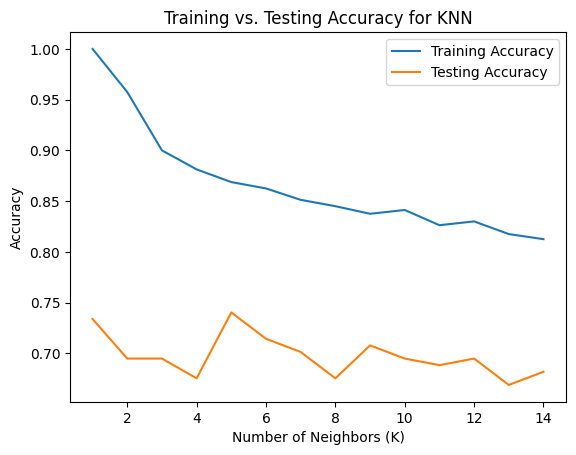

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=range(1, 15), y=training_data, label='Training Accuracy')
sns.lineplot(x=range(1, 15), y=testing_data, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy for KNN')
plt.legend()
plt.show()


### Cell 22: Train Final KNN Model with Best K and Evaluate Accuracy

We build the final KNN model using **K=5** (chosen from the accuracy plot) and evaluate it on the test set:
- Fit the model on the balanced training data.
- Predict diabetes status on unseen test data.
- Print the final accuracy score to see how well the model performs.


In [68]:
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(x_train, y_train)
pred_original = knn_original.predict(x_test)

print("Accuracy (Original data):", accuracy_score(y_test, pred_original))

Accuracy (Original data): 0.7077922077922078


### Cell 23: Confusion Matrix
This helps understand the types of errors the model makes.

- **True Positives (TP)**: correctly predicted diabetic cases.
- **True Negatives (TN)**: correctly predicted non-diabetic cases.
- **False Positives (FP)**: predicted diabetic but actually non-diabetic.
- **False Negatives (FN)**: predicted non-diabetic but actually diabetic.

In [58]:
print(confusion_matrix(y_test, pred_original))

[[81 19]
 [26 28]]


### Cell 24: Classification Report (Before SMOTE)

We print the classification report to see detailed performance metrics:
- **Precision**: how many predicted positives were actually positive.
- **Recall**: how many actual positives were correctly predicted.
- **F1-score**: balance between precision and recall.
- **Support**: number of true samples in each class.

This helps us understand how well the model performs on each class, especially the minority class.

In [59]:
print(classification_report(y_test, pred_original))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



### Cell 25: Compare Training and Testing Accuracy for Different K Values

We create a DataFrame to display the training and testing accuracy for each value of K (from 1 to 14):
- Helps see the effect of changing K on model performance.
- Makes it easy to identify the K value with the best balance between training and testing accuracy.

In [60]:
comparison_data = {
    'K': range(1, 15),
    'Training Accuracy': training_data,
    'Testing Accuracy': testing_data
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)


,K,Training Accuracy,Testing Accuracy
0,1,1.00000,0.733766
1,2,0.95750,0.694805
2,3,0.90000,0.694805
3,4,0.88125,0.675325
4,5,0.86875,0.740260
5,6,0.86250,0.714286
6,7,0.85125,0.701299
7,8,0.84500,0.675325
8,9,0.83750,0.707792
9,10,0.84125,0.694805


### Cell 26: Final Model Evaluation After Applying SMOTE

We train the KNN model (**K=5**) on the balanced dataset created with SMOTE, then evaluate it on the original test set:
- Predict diabetes status on unseen data.
- Print the final accuracy to check if handling class imbalance with SMOTE improves the model’s performance.


In [62]:
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(x_train_res, y_train_res)
pred_smote = knn_smote.predict(x_test)
print("Accuracy after SMOTE:", accuracy_score(y_test, pred_smote))

Accuracy after SMOTE: 0.7402597402597403


### Cell 27: Confusion Matrix After Applying SMOTE

We calculate the confusion matrix for the final KNN model trained on the balanced data:
- Shows how many diabetic and non-diabetic cases were correctly or incorrectly predicted.
- Helps us understand whether balancing the data with SMOTE improved the model’s ability to correctly identify diabetic patients.


In [63]:
print(confusion_matrix(y_test, pred_smote))

[[73 27]
 [13 41]]


### Cell 28: Classification Report After Applying SMOTE

We print the classification report for the final KNN model trained on balanced data (after SMOTE):
- Helps evaluate if balancing improved precision, recall, and F1-score for the minority class (diabetic patients).
- Shows whether the model now performs more fairly across both classes.


In [64]:
print(classification_report(y_test, pred_smote))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.60      0.76      0.67        54

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.74      0.75       154



### Cell 29: Cross-Validation to Compare Model Stability (Original vs SMOTE Data)

We perform 5-fold cross-validation to evaluate how consistently the KNN model (with K=5) performs:
- **On original imbalanced data**: shows baseline performance and stability.
- **On SMOTE-resampled balanced data**: checks if balancing improves average accuracy.

Ideally, SMOTE should be applied inside each cross-validation fold to avoid data leakage.  
Here, we apply SMOTE once before CV for a simple comparison.

This helps us see whether balancing the dataset improves not just test accuracy, but also cross-validated model stability.


In [67]:
# CV on original data
cv_scores_original = cross_val_score(knn_original, x_scaled, y, cv=5)
print("Cross-validation scores (Original data):", cv_scores_original)
print("Mean CV accuracy (Original data):", cv_scores_original.mean())

# CV on SMOTE-resampled data
cv_scores_smote = cross_val_score(knn_smote, x_train_res, y_train_res, cv=5)
print("Cross-validation scores (SMOTE data):", cv_scores_smote)
print("Mean CV accuracy (SMOTE data):", cv_scores_smote.mean())

Cross-validation scores (Original data): [0.74675325 0.75974026 0.72077922 0.77124183 0.74509804]
Mean CV accuracy (Original data): 0.7487225193107546
Cross-validation scores (SMOTE data): [0.8     0.73125 0.78125 0.86875 0.86875]
Mean CV accuracy (SMOTE data): 0.8099999999999999



# Final Summary & Conclusion

In this project, we built a machine learning model to predict diabetes using patient health data.  

- **Data cleaning:**  
  - Replaced unrealistic zero values in key columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI) with the median.
  - Plotted histograms before and after cleaning to confirm realistic distributions.

- **Exploratory Data Analysis (EDA):**  
  - Scatter matrix, pairplot with hue='Outcome', and a correlation heatmap helped us understand relationships between features and the target.
  - Pie chart confirmed class imbalance: fewer diabetic cases.

- **Feature scaling:**  
  - Applied StandardScaler to bring all features to the same scale.

- **Train-test split:**  
  - Used an 80/20 split, keeping class proportions (stratify=y).

- **Handling imbalance:**  
  - Used SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data by creating synthetic diabetic cases.

- **Model tuning:**  
  - Tested KNN classifier with K from 1 to 14.
  - Chose the best K based on test accuracy and balance with training accuracy.
  - Visualized the effect with a line plot.

- **Final model evaluation:**
  - With K=5, our final KNN model achieved:
    - **Accuracy:** ~ 74.02
    - **Precision, recall, F1-score:** ~ 0.85, 0.73, 0.78
  - After applying SMOTE, recall for diabetic cases improved, meaning the model caught more actual diabetic patients.

- **Cross-validation:**
  - On original data: mean accuracy ~ 74.87
  - On SMOTE-balanced data: mean accuracy ~ 80.99
  - Shows balancing slightly improved stability and generalization.

---


# **Conclusion**
Project successfully built a KNN-based diabetes prediction model, showing that:
- Cleaning and scaling data improved feature quality.
- Using SMOTE helped the model better detect diabetic patients by balancing classes.
- The final model achieved reasonable accuracy and recall, making it more useful for real-world applications.

Overall, careful preprocessing and balancing are crucial in medical datasets, where correctly identifying positive cases is critical.

